In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
data.head(7)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0


In [ ]:
data.shape

(10000, 14)

In [ ]:
df= data.drop(['RowNumber','CustomerId','Surname'],axis='columns')

In [ ]:
df.Exited=='1'

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Exited, Length: 10000, dtype: bool

In [ ]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Data Viz

In [ ]:
df.Exited=='0'

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Exited, Length: 10000, dtype: bool

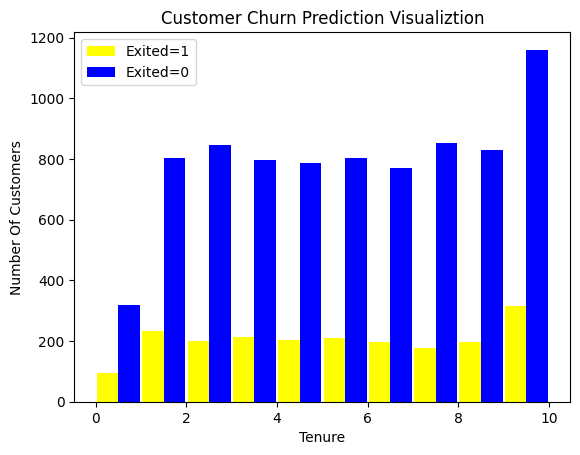

In [ ]:
Ten0=df[df.Exited==0].Tenure
Ten1=df[df.Exited==1].Tenure
plt.xlabel('Tenure')
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([Ten1,Ten0], rwidth=0.95, color=['yellow','blue'],label=['Exited=1','Exited=0'])
plt.legend()

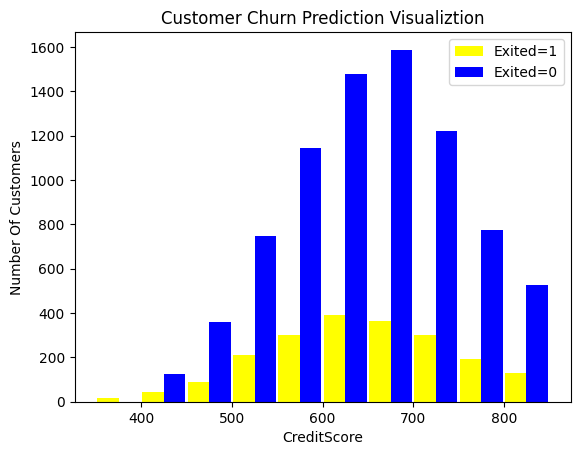

In [ ]:
cred0=df[df.Exited==0].CreditScore
cred1=df[df.Exited==1].CreditScore
plt.xlabel('CreditScore')
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([cred1,cred0], rwidth=0.95, color=['yellow','blue'],label=['Exited=1','Exited=0'])
plt.legend()

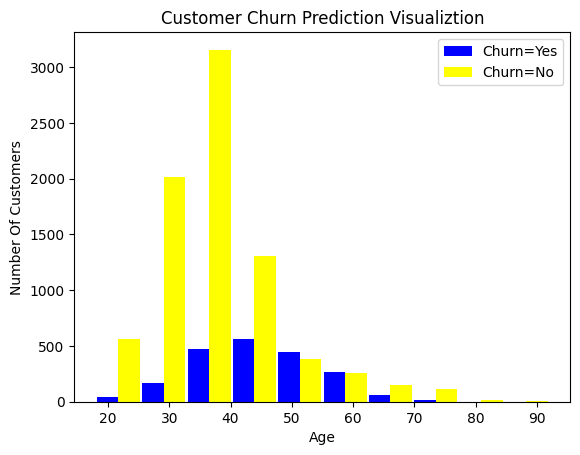

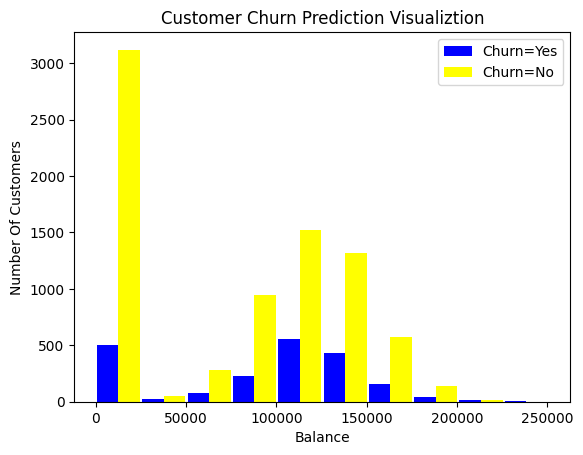

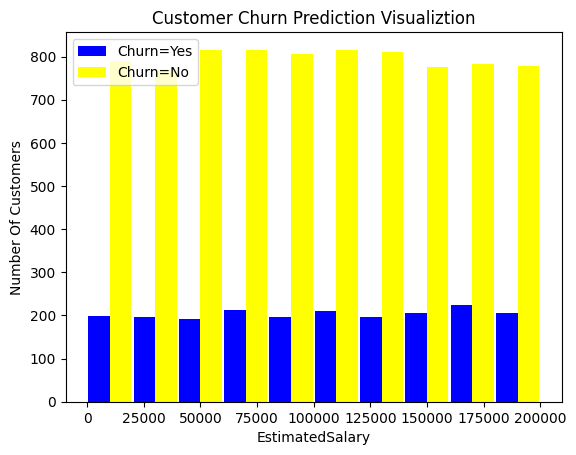

In [ ]:
for i in [ 'Age', 'Balance', 'EstimatedSalary']:

    churn_no = df[df.Exited==0][i]
    churn_yes = df[df.Exited==1][i]

    plt.xlabel(i)
    plt.ylabel("Number Of Customers")
    plt.title("Customer Churn Prediction Visualiztion")

    plt.hist([churn_yes, churn_no], rwidth=0.95, color=['blue','yellow'],label=['Churn=Yes','Churn=No'])
    plt.legend()
    plt.show()

Data preprocessing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
cols_to_scale= ['CreditScore','Age','Tenure','Balance','EstimatedSalary','NumOfProducts']
df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

In [ ]:
df.sample(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9982,0.610,Germany,Female,0.378378,0.7,0.546617,0.000000,1,0,0.575729,1
3994,0.918,Spain,Male,0.837838,0.8,0.000000,0.333333,0,1,0.170779,0
2314,0.422,Spain,Female,0.135135,0.3,0.000000,0.333333,1,0,0.956972,0


In [ ]:
df1 = pd.get_dummies(df, ['Gender','Geography'])
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_France,Gender_Germany,Gender_Spain,Geography_Female,Geography_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0,1,0
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1,1,0
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0,1,0
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0,1,0
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1,1,0


In [ ]:
df1.shape

(10000, 14)

In [ ]:
X=df1.drop('Exited',axis='columns')
y=df1['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=5)

In [ ]:
X_train.shape

(8000, 13)

In [ ]:
X_test.shape

(2000, 13)

In [ ]:
y_train.shape

(8000,)

In [ ]:
X_train[:5]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_France,Gender_Germany,Gender_Spain,Geography_Female,Geography_Male
7751,0.800,0.283784,0.6,0.000000,0.333333,0,0,0.096273,0,0,1,1,0
4154,0.752,0.216216,0.3,0.000000,0.333333,1,0,0.981478,1,0,0,0,1
3881,0.476,0.621622,0.3,0.000000,0.000000,1,1,0.948551,1,0,0,1,0
9238,0.846,0.432432,0.4,0.000000,0.333333,1,0,0.646869,1,0,0,1,0
5210,0.402,0.229730,0.7,0.517012,0.333333,0,0,0.434670,1,0,0,0,1


In [ ]:

model= keras.Sequential(
    [ keras.layers.Dense(13, input_shape=(13,), activation='relu'),
     keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')]
)
model.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=80)

Epoch 1/80
250/250 [==============================] - 1s 2ms/step - loss: 0.5355 - accuracy: 0.7880
Epoch 2/80
250/250 [==============================] - 0s 2ms/step - loss: 0.4899 - accuracy: 0.7960
Epoch 3/80
250/250 [==============================] - 0s 2ms/step - loss: 0.4867 - accuracy: 0.7960
Epoch 4/80
250/250 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.7960
Epoch 5/80
250/250 [==============================] - 0s 2ms/step - loss: 0.4818 - accuracy: 0.7960
Epoch 6/80
250/250 [==============================] - 1s 2ms/step - loss: 0.4801 - accuracy: 0.7960
Epoch 7/80
250/250 [==============================] - 1s 2ms/step - loss: 0.4783 - accuracy: 0.7960
Epoch 8/80
250/250 [==============================] - 1s 2ms/step - loss: 0.4766 - accuracy: 0.7960
Epoch 9/80
250/250 [==============================] - 1s 2ms/step - loss: 0.4751 - accuracy: 0.7960
Epoch 10/80
250/250 [==============================] - 1s 2ms/step - loss: 0.4736 - accuracy: 0.7960

In [ ]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3846 - accuracy: 0.8340


[0.38462167978286743, 0.8339999914169312]

In [ ]:
yp=model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [ ]:
yp[:10]

array([[0.07260448],
       [0.10944191],
       [0.08187649],
       [0.08634725],
       [0.09676725],
       [0.18281133],
       [0.04181382],
       [0.27293834],
       [0.03438935],
       [0.48015377]], dtype=float32)

In [ ]:
y_pred=[]
for i in yp:
  if i> 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [ ]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64